# Plots and images for papers

In [1]:
import numpy as np
import glob
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'

import sys
codefolder = '../../../../crispy'
if codefolder not in sys.path: sys.path.append(codefolder)
import logging as log
from crispy.tools.initLogger import getLogger
log = getLogger('main')
from crispy.tools.image import Image
from crispy.PISCESparams import Params
codefolder = '../../../crispy'
par = Params(codefolder)

In [2]:
cmap = 'viridis'

### Flatfield

crispy - INFO - Read data from HDU 1 of ../../../crispy/SimResults/lenslet_flat.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/SimResults/lenslet_mask.fits


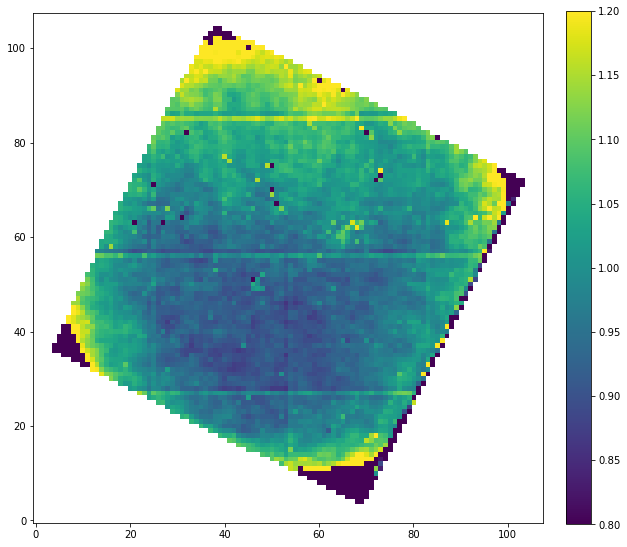

In [3]:
lenslet_flat = Image(par.exportDir+"/lenslet_flat.fits").data
lenslet_mask = Image(par.exportDir+"/lenslet_mask.fits").data

plt.figure(figsize=(10,10))
plt.imshow(lenslet_flat*lenslet_mask, cmap=cmap,vmin=0.8,vmax=1.2)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()


### PSFLets

crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170425//hires_psflets_lam605.fits


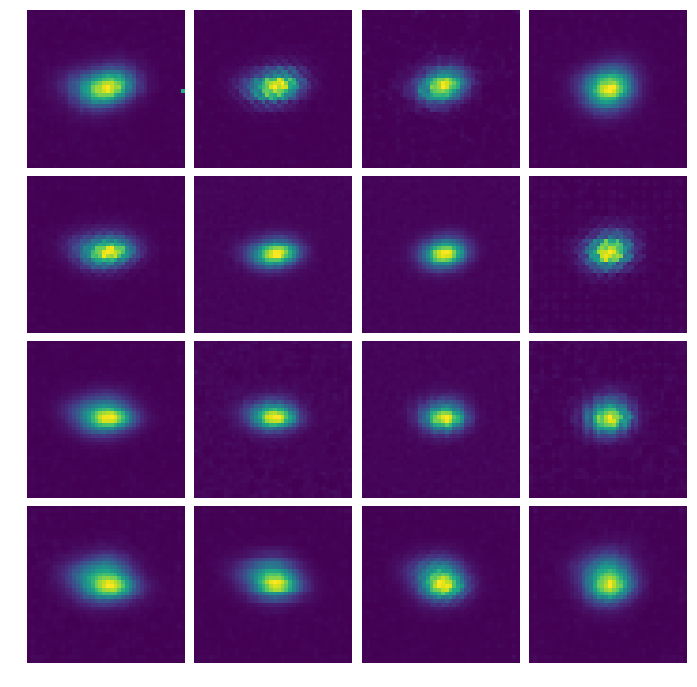

In [4]:
psflets = Image(par.wavecalDir+"/hires_psflets_lam605.fits").data
fig, axarr = plt.subplots(4,4,figsize=(12,12))
for i in range(psflets.shape[0]):
    for j in range(psflets.shape[1]):
        
        axarr[i,j].imshow(psflets[i,j],vmin=0.0)
        axarr[i,j].axis('off')
plt.subplots_adjust(wspace=0.0,hspace=0.05)
plt.savefig(par.wavecalDir+"psflets.png")        
plt.show()


### Extract cutout of microspectrum

crispy - INFO - Read data from HDU 1 of ../../../crispy/Inputs/BB.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170425//polychromeR70.fits
(12,)
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INF

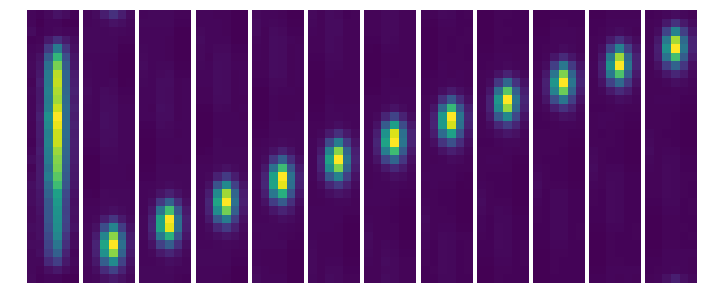

In [5]:
from crispy.tools.locate_psflets import PSFLets
from crispy.tools.reduction import get_cutout
from crispy.unitTests import testCutout
lensnum = 0
subim = testCutout(par,par.codeRoot+'/Inputs/BB.fits',lensnum=lensnum)
polychrome = Image(par.wavecalDir+'/polychromeR70.fits').data
polyshape = polychrome.shape
fig, axarr = plt.subplots(1,12,figsize=(12,12))
print axarr.shape
axarr[0].imshow(subim.T,cmap=cmap)
axarr[0].axis('off')
for i in range(1,polyshape[0]+1):
    axarr[i].imshow(testCutout(par,polychrome[i-1],lensnum=lensnum).T,cmap=cmap)
    axarr[i].axis('off')
plt.subplots_adjust(wspace=0.1,hspace=0.05)

plt.show()

crispy - INFO - Reduced cube will have 11 wavelength bins
crispy - INFO - Read data from HDU 1 of ../../../crispy/Inputs/BB.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/Inputs/BB.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170425//polychromeR70.fits
(12,)
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
[5

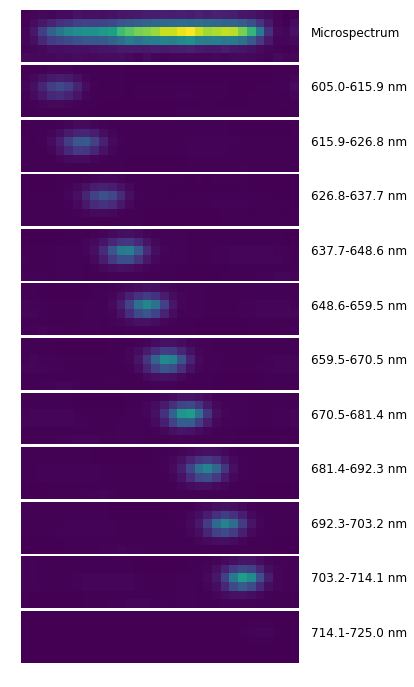

In [23]:
from crispy.tools.locate_psflets import PSFLets
from crispy.tools.reduction import get_cutout,calculateWaveList
from crispy.unitTests import testCutout,testFitCutout
lensnum = 0
lam_midpts,lam_endpts = calculateWaveList(par)
subim = testCutout(par,par.codeRoot+'/Inputs/BB.fits',lensnum=lensnum)
spectrum = testFitCutout(par,par.codeRoot+'/Inputs/BB.fits',lensnum=lensnum)

polychrome = Image(par.wavecalDir+'/polychromeR70.fits').data
polyshape = polychrome.shape
fig, axarr = plt.subplots(12,figsize=(12,12))
print axarr.shape
axarr[0].imshow(subim,cmap=cmap)
axarr[0].annotate('Microspectrum',xy=(33,2.5),annotation_clip=False,fontsize=12)
axarr[0].axis('off')
for i in range(1,polyshape[0]+1):
    axarr[i].imshow(spectrum[i-1]*testCutout(par,polychrome[i-1],lensnum=lensnum),cmap=cmap,vmin=0.0,vmax=np.amax(subim))
    axarr[i].annotate('%.1f-%.1f nm' % (lam_endpts[i-1],lam_endpts[i]),xy=(33,2.5),annotation_clip=False,fontsize=12)
    axarr[i].axis('off')
plt.subplots_adjust(wspace=0.00,hspace=0.05)

plt.show()

### Test fit cutout

crispy - INFO - Read data from HDU 1 of ../../../crispy/Inputs/BB.fits


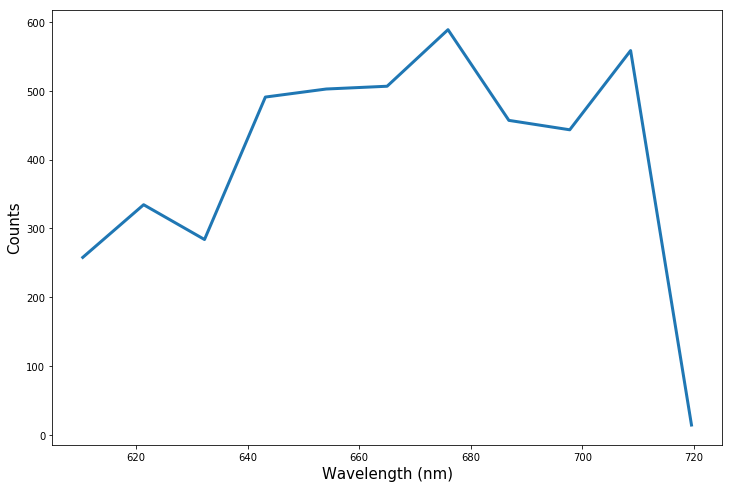

In [32]:
from crispy.unitTests import testFitCutout
spectrum = testFitCutout(par,par.codeRoot+'/Inputs/BB.fits',lensnum=lensnum)
plt.figure(figsize=(12,8))
plt.plot(lam_midpts,spectrum,linewidth=3)
plt.xlabel('Wavelength (nm)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()

### Optimal extraction

crispy - INFO - Reduced cube will have 11 wavelength bins
crispy - INFO - Read data from HDU 1 of ../../../crispy/Inputs/BB.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
crispy - INFO - Reduced cube will have 11 wavelength bins
crispy - INFO - Read data from HDU 1 of ../../../crispy/Inputs/BB.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
crispy - INFO - Reduced cube will have 11 wavelength bins
crispy - INFO - Read data from HDU 1 of ../../../crispy/Inputs/BB.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits
crispy - INFO - Reduced cube will have 11 wavelength bins
crispy - INFO - Read data from HDU 1 of ../../../crispy/Inputs/BB.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ../../../crispy/unitTestsOutputs/cutout.fits


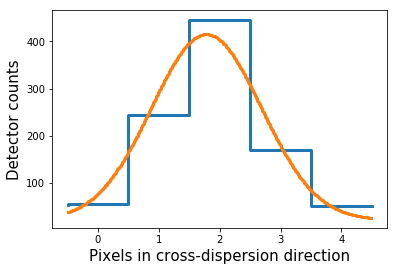

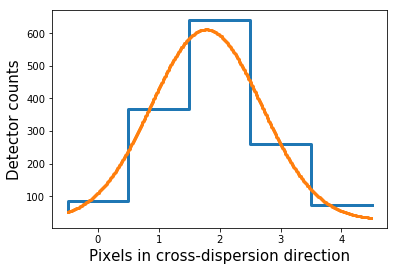

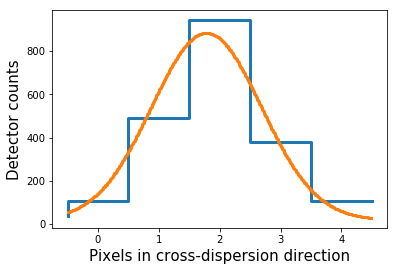

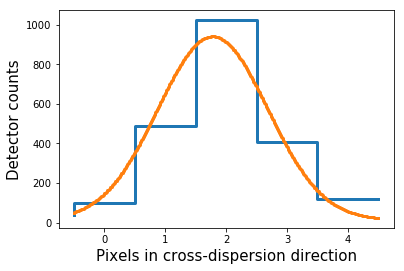

In [108]:
from crispy.tools.locate_psflets import PSFLets
from crispy.tools.reduction import get_cutout,calculateWaveList
from crispy.unitTests import testCutout,testFitCutout
import scipy
from scipy.special import erf

lensnum = 0
slicenum_list = [4,10,15,20]
for i in range(len(slicenum_list)):
    slicenum=slicenum_list[i]
    lam_midpts,lam_endpts = calculateWaveList(par)
    subim = testCutout(par,par.codeRoot+'/Inputs/BB.fits',lensnum=lensnum)
    plt.figure(figsize=(6,4))
    x = np.arange(len(subim.T[slicenum]))-0.5
    sig=2/2.35
    plt.step(x,subim.T[slicenum],linewidth=3)
    x2 = np.arange(0,len(subim.T[slicenum])-1,0.01)-0.5
    val = np.mean(np.sum(x[:,np.newaxis]*subim,axis=0)/np.sum(subim,axis=0))
    template = np.exp(-(x-val)**2/2./sig**2)/sig/np.sqrt(2.*np.pi)
    template = (erf((x + 0.5 -val) / (np.sqrt(2) * sig)) - erf((x - 0.5-val) / (np.sqrt(2) * sig)))
    val2 = val-0.5
    template2 = (erf((x2 + 0.5 -val2) / (np.sqrt(2) * sig)) - erf((x2 - 0.5-val2) / (np.sqrt(2) * sig)))
    b, a, _, _, _ = scipy.stats.linregress(template,subim.T[slicenum])
    plt.step(x2,a+b*template2,linewidth=3)
    plt.xlabel('Pixels in cross-dispersion direction',fontsize=15)
    plt.ylabel('Detector counts',fontsize=15)
#plt.legend(["Pixel values in column","Gaussian matched filter"],fontsize=15)
plt.show()

### Plot distortion map

665.0
-3.0 -0.5


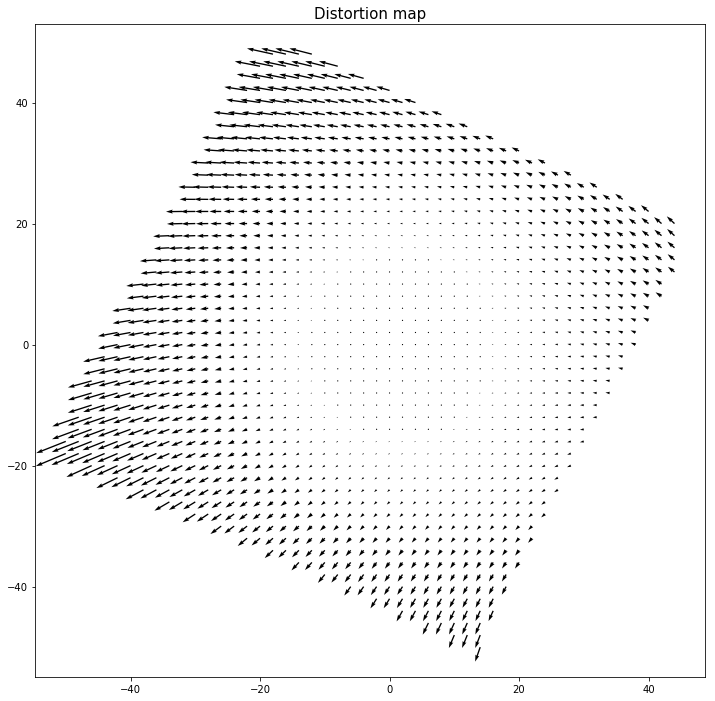

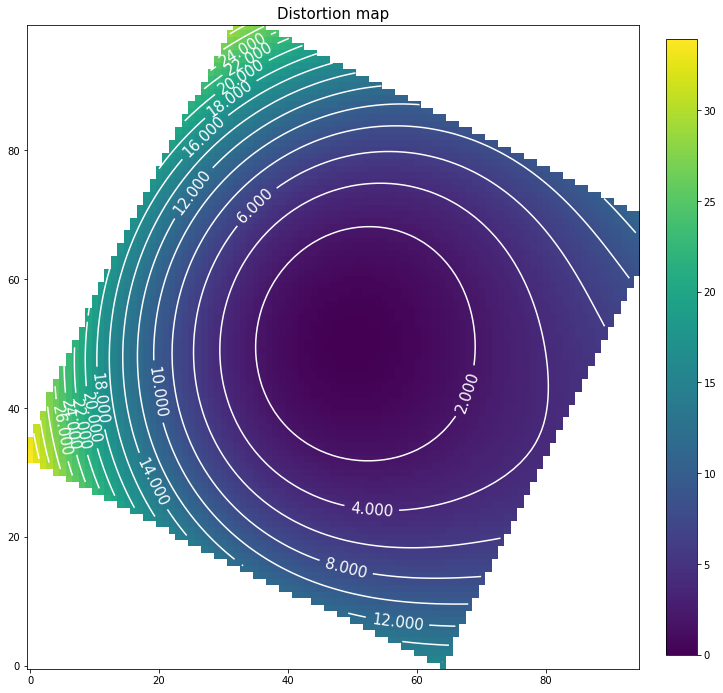

In [211]:
from crispy.tools.locate_psflets import PSFLets
psftool = PSFLets()
lamlist = np.loadtxt(par.wavecalDir + "lamsol.dat")[:, 0]
allcoef = np.loadtxt(par.wavecalDir + "lamsol.dat")[:, 1:]

# lam in nm
psftool.geninterparray(lamlist, allcoef)

# xindx = np.arange(-par.nlens/2, par.nlens/2)
# xindx, yindx = np.meshgrid(xindx, xindx)
xindx = np.arange(-50, 45)
yindx = np.arange(-50, 50)
lx = len(xindx)
ly = len(yindx)
xindx, yindx = np.meshgrid(xindx, yindx)
print lamlist[6]
allcoef_ideal = np.zeros(allcoef.shape)
indx = np.asarray([0, 1, 4, 10, 11, 14])
allcoef_ideal[:,indx] = allcoef[:,indx]
x,y = psftool.return_locations(lamlist[6], allcoef, yindx, xindx)
borderpix=4
good = (x > borderpix)*(x < 1024-borderpix)*(y > borderpix)*(y < 1024-borderpix)

psftool.geninterparray(lamlist, allcoef_ideal)
X,Y = psftool.return_locations(lamlist[6], allcoef_ideal, yindx, xindx)

U = x-X
V = y-Y
U[~good]= np.NaN
V[~good]= np.NaN

plt.figure(figsize=(12,12))
Q = plt.quiver(xindx[::2,::2], yindx[::2,::2], U[::2,::2], V[::2,::2],width=0.002,scale=700)
#plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Distortion map',fontsize=15)
#qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')

plt.figure(figsize=(12,12))
plt.imshow(np.sqrt(U**2+V**2),cmap=cmap)
plt.title('Distortion map',fontsize=15)
plt.colorbar(fraction=0.046, pad=0.04)
print np.median(xindx[0,:]),np.median(yindx[:,0])
CS = plt.contour(xindx-np.median(xindx[0,:])+lx//2,yindx-np.median(yindx[:,0])+ly//2,np.sqrt(U**2+V**2),20,colors='w')
plt.clabel(CS, fontsize=15, inline=1)
plt.show()